In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/PUC/Magister/PytorchLearning/DeepEvidentialRegression"

/content/drive/MyDrive/PUC/Magister/PytorchLearning/DeepEvidentialRegression


In [4]:
!pwd

/content/drive/MyDrive/PUC/Magister/PytorchLearning/DeepEvidentialRegression


In [1]:
import torch
import numpy as np

import data_loader
from FullyConnectedModel import EvidentialRegression
from EvidentialTrainer import EvidentialTrainer

In [2]:
datasets = ['boston', 'concrete', 'energy-efficiency', 'kin8nm', 'naval', 'power-plant', 'protein', 'wine', 'yacht']
datasets = ['kin8nm','naval', 'power-plant', 'protein', 'wine', 'yacht']
#datasets = ['boston']
num_trials = 20
num_epochs = 40

In [3]:
h_params = {
    'yacht': {'learning_rate': 5e-4, 'batch_size': 1},
    'naval': {'learning_rate': 5e-4, 'batch_size': 1},
    'concrete': {'learning_rate': 5e-3, 'batch_size': 1},
    'energy-efficiency': {'learning_rate': 2e-3, 'batch_size': 1},
    'kin8nm': {'learning_rate': 1e-3, 'batch_size': 1},
    'power-plant': {'learning_rate': 1e-3, 'batch_size': 2},
    'boston': {'learning_rate': 1e-3, 'batch_size': 8},
    'wine': {'learning_rate': 1e-4, 'batch_size': 32},
    'protein': {'learning_rate': 1e-3, 'batch_size': 64},
}

In [4]:
def save_test_results(dataset, mu, error):
    with open("test_results.csv", "a") as file:
        file.write(f"{dataset},{mu[0]},{error[0]},{mu[1]},{error[1]}\n")

In [5]:
RMSE = np.zeros((len(datasets), num_trials))
NLL = np.zeros((len(datasets), num_trials))
for di, dataset in enumerate(datasets):
    dataset_rmse = np.zeros(num_trials)
    dataset_nll = np.zeros(num_trials)
    batch_size = h_params[dataset]["batch_size"]
    learning_rate = h_params[dataset]["learning_rate"]
    for n in range(num_trials):
        (x_train, y_train), (x_test, y_test), y_scale = data_loader.load_dataset(dataset, return_as_tensor=True)
        num_iterations = num_epochs * x_train.shape[0]//batch_size
        done = False
        while not done:
            model = EvidentialRegression(x_train.size(1))
            trainer = EvidentialTrainer(model, learning_rate=learning_rate)
            rmse, nll = trainer.train(x_train, y_train, x_test, y_test, y_scale.item(), iters=num_iterations, batch_size=batch_size, verbose=False)
            del model
            done = True
#            done = False if np.isinf(nll) or np.isnan(nll) else True
        print("Trial: {} Saving {} {}".format(n, rmse, nll))
        dataset_rmse[n] = rmse
        dataset_nll[n] = nll
        RMSE[di, n] = rmse
        NLL[di, n] = nll

        
    dataset_RESULTS = np.vstack((dataset_rmse, dataset_nll))
    dataset_mu = dataset_RESULTS.mean(axis=-1)
    dataset_error = np.std(dataset_RESULTS, axis=-1)
    save_test_results(dataset, dataset_mu, dataset_error)

RESULTS = np.vstack((RMSE, NLL))
mu = RESULTS.mean(axis=-1)
error = np.std(RESULTS, axis=-1)

print("==========================")
print("[{}]: {} pm {}".format(dataset, mu, error))
print("==========================")

print("MEAN: \n{}".format(mu))
print("ERROR: \n{}".format(error))

Loading dataset kin8nm....
Done loading dataset kin8nm


c:\users\pablo\appdata\local\programs\python\python38\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


Trial: 0 Saving 0.0681886225938797 -1.2390391826629639
Loading dataset kin8nm....
Done loading dataset kin8nm
Trial: 1 Saving 0.0662025734782219 -1.218493103981018
Loading dataset kin8nm....
Done loading dataset kin8nm
Trial: 2 Saving 0.06252311915159225 -1.271696925163269
Loading dataset kin8nm....
Done loading dataset kin8nm
Trial: 3 Saving 0.06534820050001144 -1.2592018842697144
Loading dataset kin8nm....
Done loading dataset kin8nm
Trial: 4 Saving 0.06227952241897583 -1.2877651453018188
Loading dataset kin8nm....
Done loading dataset kin8nm
Trial: 5 Saving 0.0630270391702652 -1.254919171333313
Loading dataset kin8nm....
Done loading dataset kin8nm
Trial: 6 Saving 0.06457368284463882 -1.2872388362884521
Loading dataset kin8nm....
Done loading dataset kin8nm
Trial: 7 Saving 0.0662677064538002 -1.285144567489624
Loading dataset kin8nm....
Done loading dataset kin8nm
Trial: 8 Saving 0.06713120639324188 -1.279109001159668
Loading dataset kin8nm....
Done loading dataset kin8nm
Trial: 9 S

Trial: 13 Saving 3.787848711013794 2.506009578704834
Loading dataset protein....
Done loading dataset protein
Trial: 14 Saving 3.874958038330078 2.472120523452759
Loading dataset protein....
Done loading dataset protein
Trial: 15 Saving 4.164122581481934 2.5498998165130615
Loading dataset protein....
Done loading dataset protein
Trial: 16 Saving 4.197173118591309 2.593219757080078
Loading dataset protein....
Done loading dataset protein
Trial: 17 Saving 4.041424751281738 2.61209774017334
Loading dataset protein....
Done loading dataset protein
Trial: 18 Saving 3.5693585872650146 2.3326640129089355
Loading dataset protein....
Done loading dataset protein
Trial: 19 Saving 3.5932092666625977 2.5557637214660645
Loading dataset wine....
Done loading dataset wine
Trial: 0 Saving 0.5612168908119202 0.9216972589492798
Loading dataset wine....
Done loading dataset wine
Trial: 1 Saving 0.5707494020462036 0.9372315406799316
Loading dataset wine....
Done loading dataset wine
Trial: 2 Saving 0.5938

In [10]:
import pandas as pd
mine = pd.read_csv("my_test_results.csv", names=["Dataset", "RMSE mean", "RMSE std", "NLL mean", "NLL std"])
their = pd.read_csv("their_test_results.csv", names=["Dataset", "RMSE mean", "RMSE std", "NLL mean", "NLL std"])

In [11]:
mine

,Dataset,RMSE mean,RMSE std,NLL mean,NLL std
0,boston,2.828681,0.251341,2.298024,0.038764
1,concrete,5.882207,0.223839,3.115385,0.030102
2,energy-efficiency,1.919697,0.112327,1.395133,0.040464
3,kin8nm,0.065485,0.002296,-1.259663,0.026037
4,naval,0.001445,0.000219,-5.937831,0.120159
5,power-plant,2.964873,0.124678,2.568689,0.035581
6,protein,3.912076,0.181511,2.534034,0.073929
7,wine,0.574766,0.021185,0.941960,0.023274
8,yacht,1.495981,0.472989,0.755528,0.158729


In [12]:
their

,Dataset,RMSE mean,RMSE std,NLL mean,NLL std
0,boston,2.963706,0.261545,2.317949,0.057664
1,concrete,5.854937,0.190006,3.109589,0.043792
2,energy-efficiency,1.838474,0.052523,1.415253,0.033269
3,kin8nm,0.063928,0.002483,-1.281926,0.028016
4,naval,0.001334,0.000195,-5.921235,0.088266
5,power-plant,2.984156,0.119611,2.573134,0.026305
6,protein,4.255015,0.233550,2.697105,0.076872
7,wine,0.565343,0.026678,0.925334,0.042036
8,yacht,1.612182,0.584413,0.974512,0.167984


In [19]:
diff = pd.DataFrame()
diff["Dataset"] = mine["Dataset"]
diff["RMSE mean"] = mine["RMSE mean"] - their["RMSE mean"]
diff["RMSE std"] = mine["RMSE std"] - their["RMSE std"]
diff["NLL mean"] = mine["NLL mean"] - their["NLL mean"]
diff["NLL std"] = mine["NLL std"] - their["NLL std"]

In [20]:
diff

,Dataset,RMSE mean,RMSE std,NLL mean,NLL std
0,boston,-0.135026,-0.010204,-0.019926,-0.018900
1,concrete,0.027270,0.033833,0.005796,-0.013690
2,energy-efficiency,0.081223,0.059803,-0.020120,0.007195
3,kin8nm,0.001557,-0.000187,0.022263,-0.001979
4,naval,0.000111,0.000024,-0.016597,0.031893
5,power-plant,-0.019284,0.005067,-0.004445,0.009276
6,protein,-0.342940,-0.052039,-0.163071,-0.002943
7,wine,0.009423,-0.005492,0.016625,-0.018762
8,yacht,-0.116201,-0.111424,-0.218985,-0.009255


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
x_pos_mine = np.array(range(0, 2 * len(mine["Dataset"]), 2))
x_pos_their = np.array(range(1, 2 * len(mine["Dataset"]), 2))

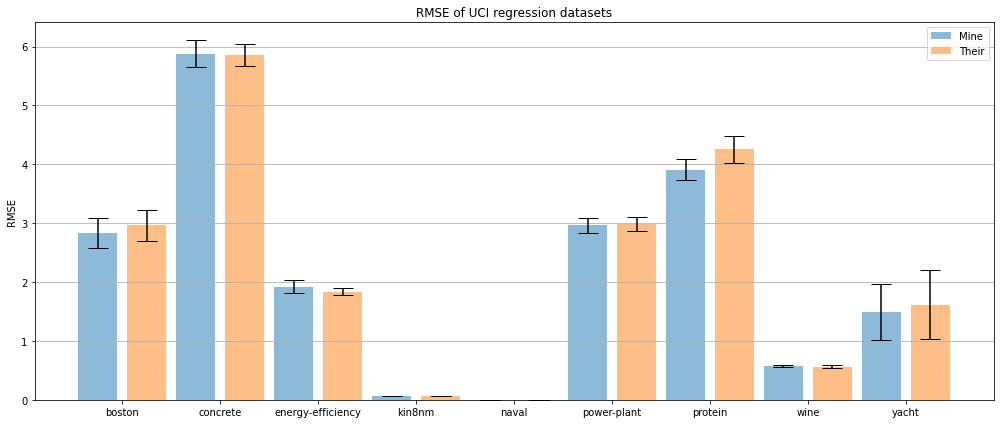

In [52]:
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(x_pos_mine, mine["RMSE mean"], yerr=mine["RMSE std"], align='center', alpha=0.5, ecolor='black', capsize=10, label="Mine")
ax.bar(x_pos_their, their["RMSE mean"], yerr=their["RMSE std"], align='center', alpha=0.5, ecolor='black', capsize=10, label="Their")
ax.set_ylabel('RMSE')
ax.set_xticks(x_pos_mine + .5)
ax.set_xticklabels(mine["Dataset"])
ax.set_title('RMSE of UCI regression datasets')
ax.yaxis.grid(True)
ax.legend()

# Save the figure and show
plt.tight_layout()
plt.savefig('RMSE_bar_plot.png')
plt.show()

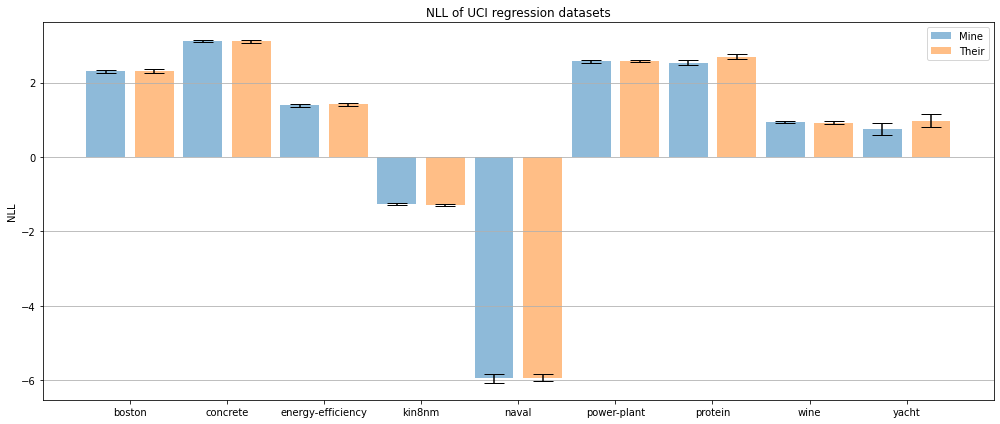

In [53]:
fig, ax = plt.subplots(figsize=(14,6))
ax.bar(x_pos_mine, mine["NLL mean"], yerr=mine["NLL std"], align='center', alpha=0.5, ecolor='black', capsize=10, label="Mine")
ax.bar(x_pos_their, their["NLL mean"], yerr=their["NLL std"], align='center', alpha=0.5, ecolor='black', capsize=10, label="Their")
ax.set_ylabel('NLL')
ax.set_xticks(x_pos_mine + .5)
ax.set_xticklabels(mine["Dataset"])
ax.set_title('NLL of UCI regression datasets')
ax.yaxis.grid(True)
ax.legend()

# Save the figure and show
plt.tight_layout()
plt.savefig('NLL_bar_plot.png')
plt.show()